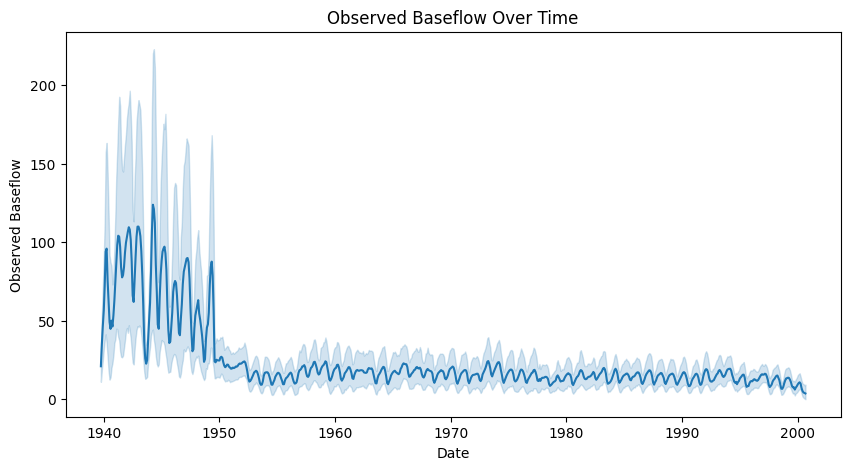

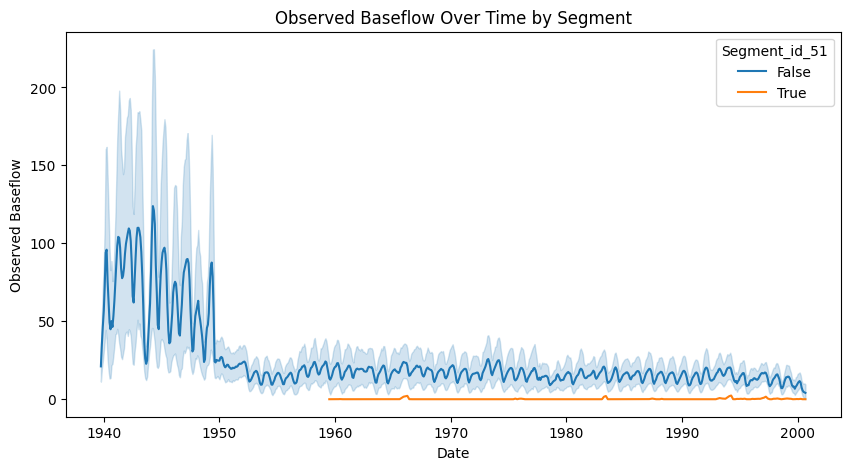

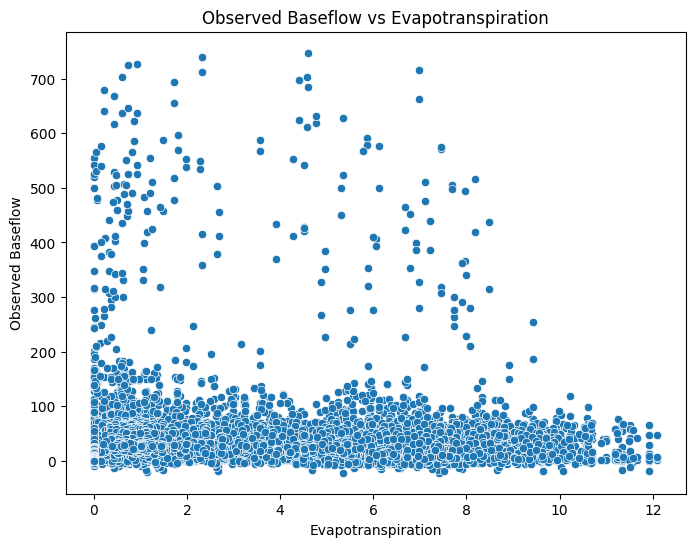

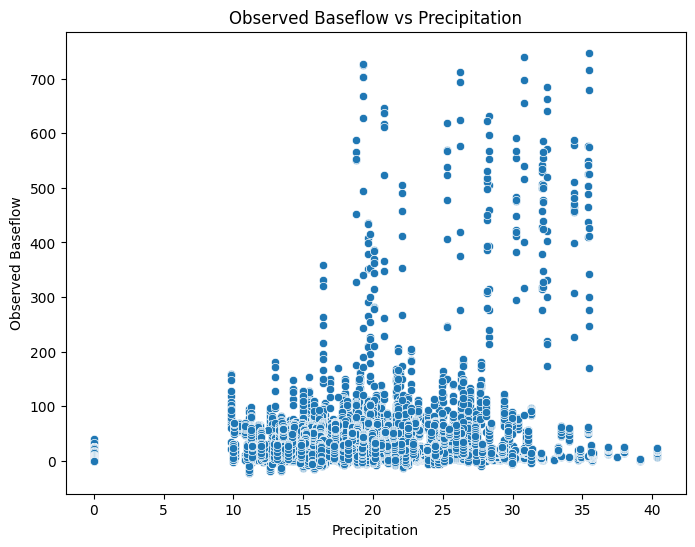

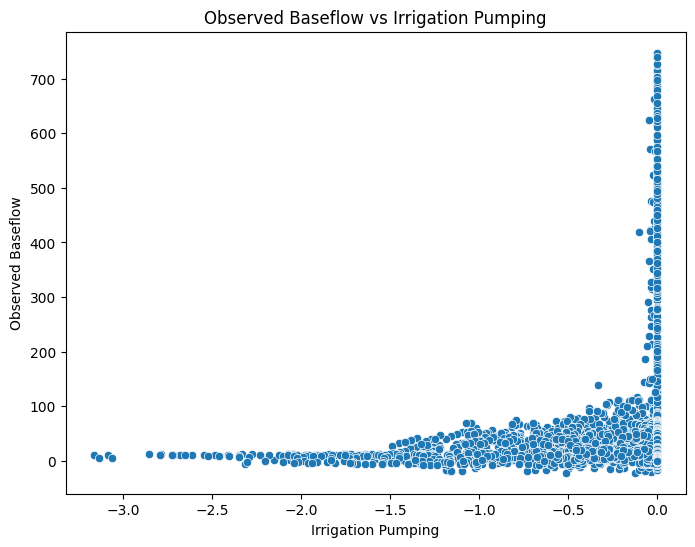

Linear Regression Results:
MAE: 9.109759217436658
RMSE: 25.240922657769175
R^2: 0.8062687576582308


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

data = pd.read_csv('RRCA_baseflow.csv')

# Date Feature Engineering
# Ensure to have date in a correct format
data['Date'] = pd.to_datetime(data['Date'] - 693963, unit='D', origin='1900-01-01')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Doing One-Hot encoding 'Segment_id' to a categorical variable 
data = pd.get_dummies(data, columns=['Segment_id'], drop_first=True)

# Observed baseflow vs time without hue(Scatter Plot)
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Observed')
plt.title("Observed Baseflow Over Time")
plt.xlabel("Date")
plt.ylabel("Observed Baseflow")
plt.show()

# Use the first one-hot encoded 'Segment_id' column as hue
segment_column = [col for col in data.columns if 'Segment_id_' in col][0]
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='Observed', hue=segment_column)
plt.title("Observed Baseflow Over Time by Segment")
plt.xlabel("Date")
plt.ylabel("Observed Baseflow")
plt.show()

# Scatter Plot: Observed Baseflow vs Evapotranspiration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Evapotranspiration', y='Observed')
plt.title("Observed Baseflow vs Evapotranspiration")
plt.xlabel("Evapotranspiration")
plt.ylabel("Observed Baseflow")
plt.show()

# Scatter Plot: Observed Baseflow vs Precipitation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Precipitation', y='Observed')
plt.title("Observed Baseflow vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Observed Baseflow")
plt.show()

# Scatter Plot: Observed Baseflow vs Irrigation pumping
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Irrigation_pumping', y='Observed')  # Ensure column name is correct
plt.title("Observed Baseflow vs Irrigation Pumping")
plt.xlabel("Irrigation Pumping")
plt.ylabel("Observed Baseflow")
plt.show()

# Interaction Terms(Feature Engineering)
data['Precip_Irrig'] = data['Precipitation'] * data['Irrigation_pumping']
data['Precip_Sq'] = data['Precipitation'] ** 2
data['Irrig_Sq'] = data['Irrigation_pumping'] ** 2

# Defining predictors and target variable
predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Precip_Irrig', 'Precip_Sq', 'Irrig_Sq', 'Year', 'Month'] + \
             [col for col in data.columns if 'Segment_id_' in col]
X = data[predictors]
y = data['Observed']

# To Handle any NaN values by dropping rows with missing values
X = X.dropna()
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))